In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a50_etf = pd.read_excel('/Users/上证50ETF.xlsx')

In [3]:
a50_etf.drop(['代码','简称'],axis = 1,inplace = True)

In [4]:
from math import sqrt , log

In [5]:
a50_etf.rename(columns = {'时间':'date','开盘价(元)':'open','最高价(元)':'high','最低价(元)':'low','收盘价(元)':'close'} , inplace = True)
a50_etf.set_index('date')

,open,high,low,close
date,,,,
2016-01-04,2.411,2.413,2.271,2.278
2016-01-05,2.260,2.311,2.230,2.286
2016-01-06,2.290,2.320,2.275,2.317
2016-01-07,2.286,2.286,2.165,2.177
2016-01-08,2.236,2.259,2.156,2.219
...,...,...,...,...
2021-02-22,4.002,4.005,3.866,3.873
2021-02-23,3.849,3.927,3.845,3.886
2021-02-24,3.887,3.896,3.752,3.788


In [6]:
a50_etf['Rt'] = (a50_etf['close']-a50_etf['close'].shift(1))/a50_etf['close']

计算 对数收益率

In [7]:
a50_etf['log_Rt'] = np.log(a50_etf['close']/a50_etf['close'].shift(1)).dropna()

画出对数收益率的概率分布图

In [8]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Rt', ylabel='Density'>

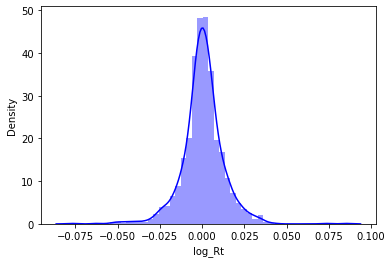

In [9]:
sns.distplot(a50_etf.log_Rt, color='b')

看一下数据分布的偏度和峰度

In [10]:
print("skew: " , a50_etf.log_Rt.skew())
print("kurt: " , a50_etf.log_Rt.kurt())

-0.17893578779335442
5.743967652308737


In [11]:
a50_etf['volatility_20'] = a50_etf['log_Rt'].rolling(window = 20 , center = False).std()

【1】以下部分参考文章地址：http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

绘制对数收益率曲线，波动率曲线

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

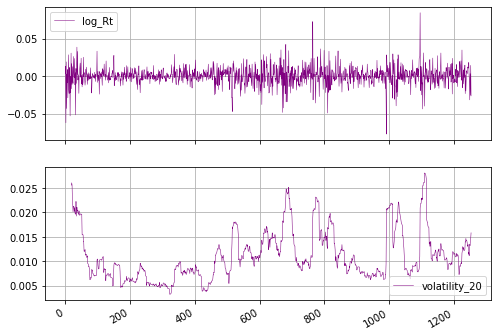

In [12]:
a50_etf[['log_Rt','volatility_20']].plot(subplots = True , 
                                         lw = 0.5 , 
                                         color = 'purple' , 
                                         figsize = (8 , 6) , 
                                         grid = True)

需要用到statsmodels包

In [13]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

画 对数收益率的自相关系数图、偏自相关系数图、qq图

Text(0.5, 1.0, 'QQ-plot')

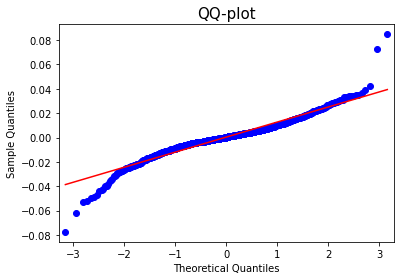

In [38]:
sm.qqplot(a50_etf.log_Rt.dropna() , line = 's')
plt.title('QQ-plot' , size = 15)

In [35]:
def arch_fig(data , lags = None):
    
    #画出
    
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize = (10 , 8))
        layout = (3 , 2)
    
    ts_ax = plt.subplot2grid (layout , (1 , 0),colspan=2)
    acf_ax = plt.subplot2grid(layout , (2 , 0))
    pacf_ax = plt.subplot2grid(layout , (2 , 1))
    
    
    data.plot(ax = ts_ax , lw = 0.7)
    ts_ax.set_title('log return')
    
    smt.graphics.plot_acf(data , 
                          lags = lags ,
                          ax = acf_ax , 
                          alpha = 0.5)    
    acf_ax.set_title('autocorrelation')
    
    smt.graphics.plot_pacf(data , 
                           lags = lags ,
                           ax = pacf_ax , 
                           alpha = 0.5)
    pacf_ax.set_title('partial autocorrelation')
    

    
    plt.tight_layout()
    
    return

别问为啥图上面紫色下面蓝色，理科生最后的审美倔强

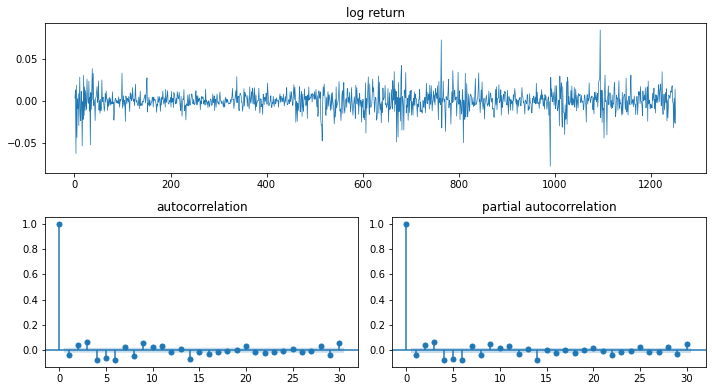

In [36]:
arch_fig(a50_etf.log_Rt.dropna() , lags = 30)

In [16]:
a50_etf.to_excel('/Users/a50etf已处理数据.xlsx' , index = None)

In [17]:
a50_etf

,date,open,high,low,close,Rt,log_Rt,volatility_20
0,2016-01-04,2.411,2.413,2.271,2.278,NaN,NaN,NaN
1,2016-01-05,2.260,2.311,2.230,2.286,0.003500,0.003506,NaN
2,2016-01-06,2.290,2.320,2.275,2.317,0.013379,0.013470,NaN
3,2016-01-07,2.286,2.286,2.165,2.177,-0.064309,-0.062325,NaN
4,2016-01-08,2.236,2.259,2.156,2.219,0.018927,0.019109,NaN
...,...,...,...,...,...,...,...,...
1248,2021-02-22,4.002,4.005,3.866,3.873,-0.032275,-0.031765,0.013483
1249,2021-02-23,3.849,3.927,3.845,3.886,0.003345,0.003351,0.013245
1250,2021-02-24,3.887,3.896,3.752,3.788,-0.025871,-0.025542,0.014530
1251,2021-02-25,3.824,3.862,3.804,3.843,0.014312,0.014415,0.014708
